# Part I: Eigenfaces for Face Recognition


## 1) Carga de datos y verificación de shapes

Shapes -> X_train, y_train: (540, 2500) (540,)
Shapes -> X_test,  y_test : (100, 2500) (100,)


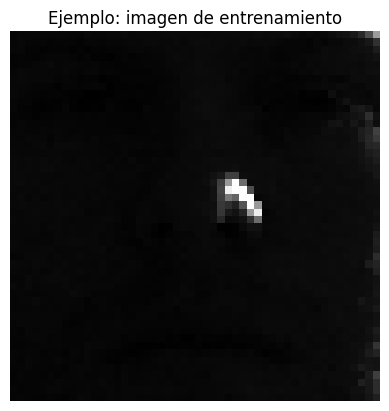

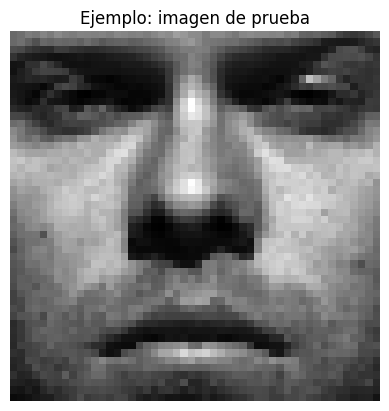

In [ ]:
# Importación base
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# Utils
from utils.io_utils import load_faces, show_image

# Rutas
DATA_DIR = Path("../data") 
train_txt = DATA_DIR / "train.txt"
test_txt  = DATA_DIR / "test.txt"

# Carga
X_train, y_train = load_faces(train_txt)
X_test,  y_test  = load_faces(test_txt)

print("Shapes -> X_train, y_train:", X_train.shape, y_train.shape)
print("Shapes -> X_test,  y_test :", X_test.shape,  y_test.shape)

# Vista rápida de un ejemplo
show_image(X_train[0], size=(50,50), title="Ejemplo: imagen de entrenamiento")
show_image(X_test[0],  size=(50,50), title="Ejemplo: imagen de prueba")


> - Aplanamos cada imagen 50×50 → vector de 2500 elementos.
> - Verificamos dimensiones para evitar sorpresas.

## 2) Cálculo del promedio (μ) y visualización

> - El promedio captura lo común entre todas las caras.
> - Es el centro del “espacio de rostros”. Se resta para centrar los datos.

Vector μ (mean) shape: (2500,)


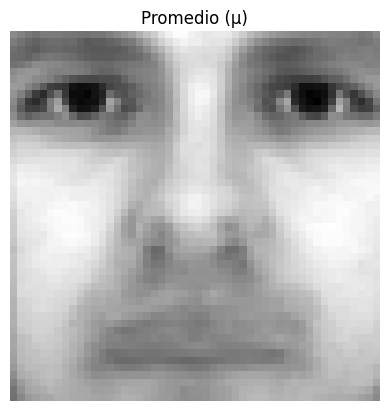

In [3]:
from utils.pca_utils import compute_mean

mu = compute_mean(X_train)
print("Vector μ (mean) shape:", mu.shape)

show_image(mu, size=(50,50), title="Promedio (μ)")


## 3) Centrado de los datos (mean subtraction)

> - Restamos μ a cada imagen para que el PCA modele variación alrededor del promedio.
> - Centramos train y test con el mismo μ.

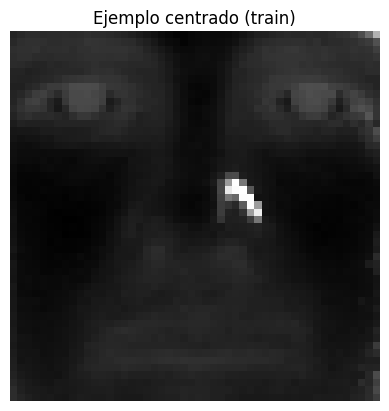

In [4]:
from utils.pca_utils import demean_data

Xc_train = demean_data(X_train, mu)
Xc_test  = demean_data(X_test,  mu)

# Visualiza un ejemplo "centrado" (contraste cambia)
show_image(Xc_train[0], size=(50,50), title="Ejemplo centrado (train)")


## 4) Cálculo de Eigenfaces (PCA vía SVD)

Qué hacemos y por qué:

Usamos SVD de la matriz centrada: Xc = U Σ Vᵀ.

Las columnas de V son las eigenfaces (componentes principales).

SVD es numéricamente más estable que eigen de XᵀX.

V shape (eigenfaces): (2500, 540)
S shape (singulares): (540,)


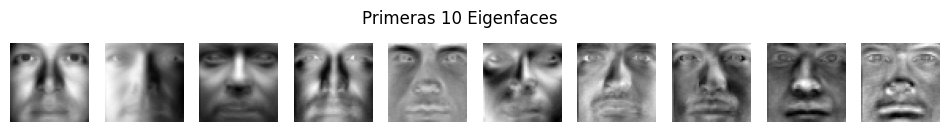

In [5]:
from utils.pca_utils import compute_pca, plot_eigenfaces

V, S = compute_pca(Xc_train)
print("V shape (eigenfaces):", V.shape)      # (2500, n_comp)
print("S shape (singulares):", S.shape)       # (min(n_samples, n_features),)

# Muestra 10 eigenfaces
plot_eigenfaces(V, num=10, img_shape=(50,50))


## 5) Proyección a un subespacio de dimensión $r$ (features)

> - Para un $r$ dado, usamos las $r$ primeras eigenfaces $V_r$.
> - Proyectamos $Xc$ a ese subespacio: $F = Xc · V_r$ (features).
> - Repetiremos esto para varios $r$.

In [6]:
from utils.pca_utils import project_data

r = 10  # empezamos con r=10 como pide el enunciado
F_train = project_data(Xc_train, V, r)
F_test  = project_data(Xc_test,  V, r)

print("F_train shape:", F_train.shape)  # (540, r)
print("F_test  shape:", F_test.shape)   # (100, r)


F_train shape: (540, 10)
F_test  shape: (100, 10)


## 6) Clasificación con Regresión Logística (sin intercepto)

>- Con las features $ F_t/F_t$, entrenamos un clasificador.
>- Como los datos están centrados, el enunciado pide sin intercepto.
>- Usamos LogisticRegression (OvR o multinomial)

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Modelo: sin intercepto, solver robusto y más iteraciones por seguridad
clf = LogisticRegression(
    fit_intercept=False,
    multi_class="ovr",   # también se puede probar "multinomial" y "ovr"
    solver="lbfgs",
    max_iter=2000
)

clf.fit(F_train, y_train)
y_pred = clf.predict(F_test)
acc_r10 = accuracy_score(y_test, y_pred)
print(f"Accuracy en test (r=10): {acc_r10:.4f}")


Accuracy en test (r=10): 0.5900


c:\Users\pc\Desktop\PEU DATA SCIENCE INEI\PEU INEI\ML _II\Tarea_II\ENEI-2025-ML2-Tarea2\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


> - Con solo 10 componentes, la accuracy de 59 % indica que el modelo todavía no capta suficiente variabilidad facial.
> - Este resultado es esperable: pocos componentes (gran pérdida de información útil para discriminar identidades).
> - Un r demasiado pequeño genera subespacios pobres (bajo poder predictivo).

## 7) Barrido r = 1..200 y curva de accuracy

> - Repetimos el proceso para distintos r y graficamos accuracy vs r.

c:\Users\pc\Desktop\PEU DATA SCIENCE INEI\PEU INEI\ML _II\Tarea_II\ENEI-2025-ML2-Tarea2\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\pc\Desktop\PEU DATA SCIENCE INEI\PEU INEI\ML _II\Tarea_II\ENEI-2025-ML2-Tarea2\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\pc\Desktop\PEU DATA SCIENCE INEI\PEU INEI\ML _II\Tarea_II\ENEI-2025-ML2-Tarea2\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(Logis

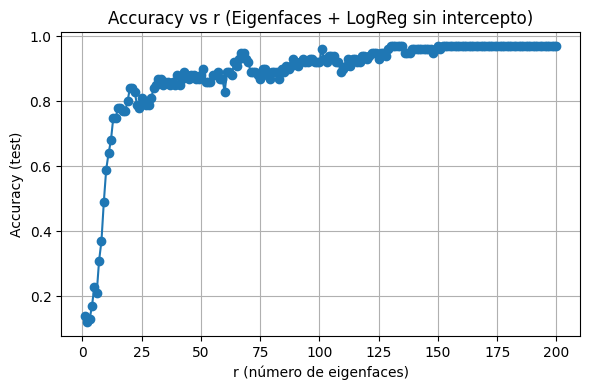

Mejor r en 1..200: r=130 con accuracy=0.9700


In [8]:
from utils.pca_utils import plot_curve

rs = range(1, 201)
accs = []

for r in rs:
    F_train_r = project_data(Xc_train, V, r)
    F_test_r  = project_data(Xc_test,  V, r)
    
    clf = LogisticRegression(
        fit_intercept=False,
        multi_class="ovr",
        solver="lbfgs",
        max_iter=1000
    )
    clf.fit(F_train_r, y_train)
    y_pred = clf.predict(F_test_r)
    accs.append(accuracy_score(y_test, y_pred))

plot_curve(
    x_vals=list(rs),
    y_vals=accs,
    xlabel="r (número de eigenfaces)",
    ylabel="Accuracy (test)",
    title="Accuracy vs r (Eigenfaces + LogReg sin intercepto)"
)

best_r = int(rs[int(np.argmax(accs))])
best_acc = np.max(accs)
print(f"Mejor r en 1..200: r={best_r} con accuracy={best_acc:.4f}")


- La precisión mejora progresivamente conforme aumenta r.
- A partir de aprox. 100 eigenfaces, el modelo capta casi toda la varianza facial y alcanza 97 % de acierto.
- Más allá de r=130 no se gana mucho, lo que sugiere que las primeras 130 componentes ya contienen la información relevante.
> El mejor compromiso entre complejidad y desempeño ocurre cerca de r = 130.

## 8) Reconstrucción de bajo rango y pérdida de Frobenius

Qué hacemos y por qué:

Reconstruimos $X' = F · V_rᵀ + μ$

Calculamos distancia Frobenius promedio: 
- Error de reconstrucción
$\quad E_r = \frac{\| X - X' \|_F^2}{n}$ 

Graficamos error vs $r$. Debería decrecer monótonamente.

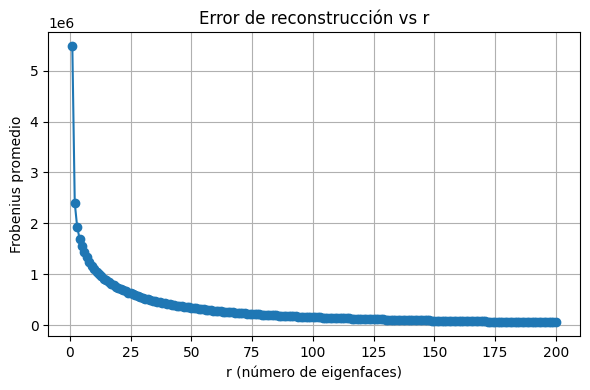

In [9]:
from utils.pca_utils import reconstruct_data, plot_curve
import numpy as np

rs = range(1, 201)
recon_errors = []

for r in rs:
    # Proyecciones
    F_train_r = project_data(Xc_train, V, r)
    # Reconstrucción en el espacio original
    X_rec = reconstruct_data(F_train_r, V, mu, r)
    
    # Error Frobenius promedio (equivalente a tr((X-X')ᵀ(X-X'))/n)
    diff = X_train - X_rec
    frob = np.trace(diff.T @ diff) / X_train.shape[0]
    recon_errors.append(frob)

plot_curve(
    x_vals=list(rs),
    y_vals=recon_errors,
    xlabel="r (número de eigenfaces)",
    ylabel="Frobenius promedio",
    title="Error de reconstrucción vs r"
)


> - El error disminuye fuertemente al inicio (r < 25) y luego se estabiliza.
> - Este comportamiento confirma que las primeras eigenfaces explican la mayor parte de la varianza total.
> - Para r > 100, las mejoras son marginales, las componentes adicionales solo capturan detalles o ruido.

> La curva muestra una típica “codo” (elbow) del PCA, validando que el modelo captura casi toda la información útil con $r$: 100-150.

### Figuras y resultados

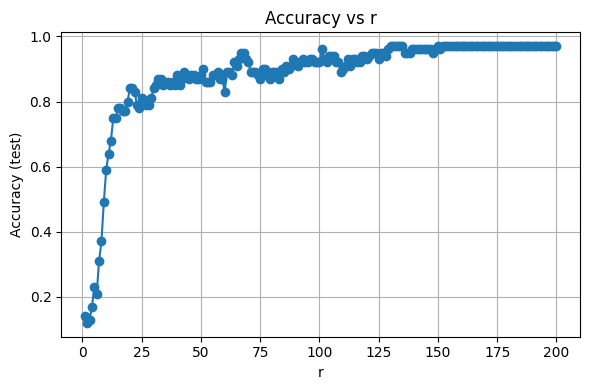

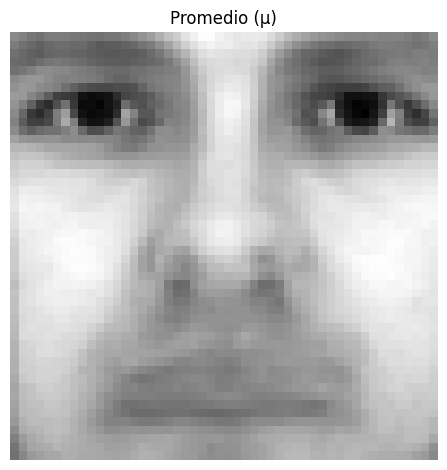

In [12]:
from pathlib import Path
import matplotlib.pyplot as plt

OUT_FIG = Path("../report/figuras")
OUT_FIG.mkdir(parents=True, exist_ok=True)

# Ejemplo: re-graficar accuracy vs r y guardar
plt.figure(figsize=(6,4))
plt.plot(list(rs), accs, marker="o")
plt.xlabel("r")
plt.ylabel("Accuracy (test)")
plt.title("Accuracy vs r")
plt.grid(True)
plt.tight_layout()
plt.savefig(OUT_FIG / "accuracy_vs_r.png", dpi=200)
plt.show()

# Ejemplo: guardar promedio como imagen
plt.imshow(mu.reshape(50,50), cmap="gray")
plt.axis("off")
plt.title("Promedio (μ)")
plt.tight_layout()
plt.savefig(OUT_FIG / "mean_face.png", dpi=200)
plt.show()


## Conclusión global

Se aplicó PCA sobre 540 imágenes faciales (50×50 px) para construir un espacio de Eigenfaces.

El análisis mostró que:
> - Las primeras decenas de componentes concentran la mayor varianza de las imágenes.
> - Con solo 10 componentes, la clasificación alcanza 59 %, reflejando pérdida de información.
> - Al ampliar a ~130 eigenfaces, la precisión llega a 97 %, demostrando que la reducción de dimensionalidad preserva información discriminativa suficiente.
> - El error de reconstrucción decrece de forma monotónica y se estabiliza a partir de $r$ $≈$ $100$, confirmando la saturación del poder representativo.

**En conjunto, se evidencia que el PCA permite representar rostros en un subespacio compacto que conserva las características esenciales, facilitando la clasificación con alta precisión y bajo costo computacional.**